In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  4.26it/s]

11it [00:00,  5.97it/s]

31it [00:00,  8.42it/s]

53it [00:00, 11.82it/s]

65it [00:00, 15.83it/s]

81it [00:00, 21.66it/s]

93it [00:00, 28.44it/s]

110it [00:01, 37.83it/s]

123it [00:01, 47.51it/s]

140it [00:01, 60.56it/s]

154it [00:01, 68.62it/s]

167it [00:01, 76.96it/s]

180it [00:01, 86.05it/s]

198it [00:01, 101.87it/s]

219it [00:01, 119.09it/s]

235it [00:01, 127.54it/s]

251it [00:02, 131.91it/s]

267it [00:02, 137.51it/s]

283it [00:02, 106.81it/s]

296it [00:02, 103.33it/s]

308it [00:02, 101.33it/s]

321it [00:02, 107.95it/s]

334it [00:02, 113.70it/s]

354it [00:02, 127.68it/s]

370it [00:03, 134.53it/s]

386it [00:03, 139.66it/s]

405it [00:03, 151.06it/s]

427it [00:03, 166.02it/s]

449it [00:03, 177.67it/s]

470it [00:03, 185.17it/s]

491it [00:03, 191.72it/s]

511it [00:03, 178.43it/s]

530it [00:03, 142.84it/s]

546it [00:04, 146.31it/s]

562it [00:04, 148.27it/s]

578it [00:04, 151.30it/s]

597it [00:04, 159.18it/s]

614it [00:04, 143.89it/s]

630it [00:04, 132.82it/s]

655it [00:04, 153.67it/s]

672it [00:04, 153.81it/s]

689it [00:05, 145.56it/s]

705it [00:05, 147.10it/s]

721it [00:05, 141.10it/s]

737it [00:05, 144.81it/s]

752it [00:05, 138.45it/s]

768it [00:05, 142.47it/s]

792it [00:05, 160.84it/s]

814it [00:05, 173.24it/s]

839it [00:05, 189.10it/s]

860it [00:06, 182.77it/s]

880it [00:06, 184.10it/s]

899it [00:06, 168.58it/s]

917it [00:06, 164.41it/s]

934it [00:06, 161.76it/s]

951it [00:06, 152.97it/s]

967it [00:06, 151.53it/s]

987it [00:06, 162.42it/s]

1004it [00:06, 152.93it/s]

1020it [00:07, 150.98it/s]

1036it [00:07, 138.44it/s]

1062it [00:07, 160.10it/s]

1080it [00:07, 161.14it/s]

1099it [00:07, 167.55it/s]

1117it [00:07, 166.58it/s]

1135it [00:07, 140.08it/s]

1151it [00:07, 141.81it/s]

1168it [00:08, 148.89it/s]

1185it [00:08, 154.03it/s]

1202it [00:08, 158.49it/s]

1219it [00:08, 161.30it/s]

1240it [00:08, 171.08it/s]

1264it [00:08, 186.69it/s]

1291it [00:08, 204.58it/s]

1315it [00:08, 213.86it/s]

1343it [00:08, 228.98it/s]

1369it [00:08, 236.45it/s]

1394it [00:09, 228.28it/s]

1420it [00:09, 233.48it/s]

1444it [00:09, 210.27it/s]

1466it [00:09, 200.37it/s]

1491it [00:09, 211.73it/s]

1519it [00:09, 228.02it/s]

1543it [00:09, 212.17it/s]

1565it [00:09, 196.92it/s]

1586it [00:10, 173.31it/s]

1609it [00:10, 185.92it/s]

1634it [00:10, 200.82it/s]

1656it [00:10, 201.94it/s]

1677it [00:10, 170.84it/s]

1696it [00:10, 175.97it/s]

1723it [00:10, 196.33it/s]

1748it [00:10, 208.33it/s]

1771it [00:10, 196.21it/s]

1792it [00:11, 181.15it/s]

1812it [00:11, 177.32it/s]

1831it [00:11, 173.35it/s]

1849it [00:11, 171.79it/s]

1867it [00:11, 170.16it/s]

1885it [00:11, 170.55it/s]

1912it [00:11, 190.46it/s]

1939it [00:11, 208.63it/s]

1969it [00:11, 228.22it/s]

1994it [00:12, 203.80it/s]

2016it [00:12, 194.76it/s]

2037it [00:12, 183.73it/s]

2057it [00:12, 183.75it/s]

2081it [00:12, 197.29it/s]

2102it [00:12, 175.86it/s]

2121it [00:12, 159.54it/s]

2138it [00:13, 132.83it/s]

2153it [00:13, 118.02it/s]

2167it [00:13, 115.06it/s]

2183it [00:13, 123.49it/s]

2198it [00:13, 129.88it/s]

2214it [00:13, 135.77it/s]

2230it [00:13, 141.91it/s]

2247it [00:13, 144.40it/s]

2263it [00:13, 146.42it/s]

2279it [00:14, 148.77it/s]

2296it [00:14, 152.96it/s]

2312it [00:14, 151.62it/s]

2328it [00:14, 151.35it/s]

2344it [00:14, 148.63it/s]

2359it [00:14, 142.40it/s]

2374it [00:14, 142.58it/s]

2389it [00:14, 140.63it/s]

2405it [00:14, 143.32it/s]

2420it [00:15, 138.75it/s]

2436it [00:15, 144.49it/s]

2453it [00:15, 150.30it/s]

2470it [00:15, 155.06it/s]

2487it [00:15, 157.10it/s]

2504it [00:15, 157.79it/s]

2520it [00:15, 152.53it/s]

2536it [00:15, 154.11it/s]

2553it [00:15, 154.30it/s]

2569it [00:15, 155.11it/s]

2586it [00:16, 157.04it/s]

2602it [00:16, 147.28it/s]

2618it [00:16, 149.19it/s]

2634it [00:16, 150.54it/s]

2656it [00:16, 165.02it/s]

2681it [00:16, 182.71it/s]

2701it [00:16, 161.96it/s]

2719it [00:16, 156.75it/s]

2736it [00:17, 157.51it/s]

2753it [00:17, 157.88it/s]

2770it [00:17, 157.68it/s]

2787it [00:17, 157.65it/s]

2803it [00:17, 156.79it/s]

2819it [00:17, 156.85it/s]

2835it [00:17, 155.15it/s]

2851it [00:17, 150.58it/s]

2868it [00:17, 153.94it/s]

2885it [00:17, 156.02it/s]

2905it [00:18, 167.00it/s]

2933it [00:18, 188.98it/s]

2954it [00:18, 176.30it/s]

2973it [00:18, 173.61it/s]

2992it [00:18, 167.46it/s]

3010it [00:18, 166.55it/s]

3028it [00:18, 166.85it/s]

3045it [00:18, 160.26it/s]

3069it [00:18, 177.74it/s]

3091it [00:19, 187.92it/s]

3111it [00:19, 181.44it/s]

3130it [00:19, 174.48it/s]

3154it [00:19, 189.37it/s]

3174it [00:19, 191.75it/s]

3194it [00:19, 181.34it/s]

3213it [00:19, 180.64it/s]

3232it [00:19, 181.99it/s]

3251it [00:20, 163.67it/s]

3268it [00:20, 163.14it/s]

3285it [00:20, 161.31it/s]

3302it [00:20, 161.38it/s]

3319it [00:20, 134.98it/s]

3337it [00:20, 145.07it/s]

3361it [00:20, 164.31it/s]

3383it [00:20, 177.45it/s]

3405it [00:20, 187.94it/s]

3425it [00:21, 178.70it/s]

3444it [00:21, 171.77it/s]

3462it [00:21, 168.52it/s]

3482it [00:21, 176.60it/s]

3505it [00:21, 189.40it/s]

3529it [00:21, 201.37it/s]

3550it [00:21, 188.35it/s]

3570it [00:21, 181.90it/s]

3594it [00:21, 194.13it/s]

3618it [00:22, 204.39it/s]

3639it [00:22, 196.27it/s]

3660it [00:22, 182.11it/s]

3680it [00:22, 186.33it/s]

3705it [00:22, 199.84it/s]

3726it [00:22, 187.47it/s]

3746it [00:22, 175.54it/s]

3765it [00:22, 159.63it/s]

3782it [00:22, 158.74it/s]

3799it [00:23, 154.16it/s]

3816it [00:23, 157.06it/s]

3833it [00:23, 159.43it/s]

3850it [00:23, 161.39it/s]

3868it [00:23, 166.09it/s]

3893it [00:23, 183.71it/s]

3916it [00:23, 194.50it/s]

3937it [00:23, 191.07it/s]

3957it [00:23, 176.14it/s]

3976it [00:24, 173.33it/s]

4001it [00:24, 190.45it/s]

4022it [00:24, 195.68it/s]

4043it [00:24, 197.01it/s]

4064it [00:24, 186.81it/s]

4084it [00:24, 178.79it/s]

4103it [00:24, 181.67it/s]

4125it [00:24, 190.05it/s]

4148it [00:24, 199.37it/s]

4169it [00:25, 181.00it/s]

4188it [00:25, 175.98it/s]

4208it [00:25, 182.09it/s]

4228it [00:25, 186.88it/s]

4250it [00:25, 194.02it/s]

4270it [00:25, 185.64it/s]

4289it [00:25, 175.44it/s]

4307it [00:25, 172.17it/s]

4322it [00:25, 166.61it/s]


0it [00:00, ?it/s]

12it [00:00, 116.38it/s]

30it [00:00, 129.25it/s]

49it [00:00, 141.17it/s]

67it [00:00, 149.99it/s]

85it [00:00, 157.73it/s]

104it [00:00, 165.53it/s]

130it [00:00, 184.62it/s]

149it [00:00, 178.65it/s]

175it [00:00, 196.62it/s]

196it [00:01, 199.77it/s]

217it [00:01, 180.62it/s]

236it [00:01, 178.95it/s]

255it [00:01, 180.08it/s]

276it [00:01, 182.95it/s]

303it [00:01, 200.56it/s]

324it [00:01, 166.79it/s]

343it [00:01, 158.76it/s]

369it [00:02, 179.66it/s]

395it [00:02, 196.57it/s]

417it [00:02, 195.68it/s]

438it [00:02, 167.78it/s]

457it [00:02, 171.31it/s]

476it [00:02, 170.58it/s]

503it [00:02, 190.73it/s]

530it [00:02, 208.58it/s]

553it [00:02, 194.26it/s]

574it [00:03, 183.54it/s]

594it [00:03, 170.84it/s]

612it [00:03, 173.40it/s]

630it [00:03, 160.02it/s]

648it [00:03, 164.75it/s]

665it [00:03, 151.25it/s]

681it [00:03, 150.73it/s]

699it [00:03, 156.46it/s]

725it [00:04, 176.02it/s]

754it [00:04, 198.55it/s]

776it [00:04, 186.12it/s]

801it [00:04, 199.74it/s]

823it [00:04, 195.04it/s]

844it [00:04, 192.56it/s]

864it [00:04, 192.06it/s]

885it [00:04, 196.39it/s]

913it [00:04, 214.50it/s]

941it [00:04, 230.45it/s]

965it [00:05, 210.24it/s]

987it [00:05, 203.16it/s]

1009it [00:05, 205.43it/s]

1034it [00:05, 215.45it/s]

1057it [00:05, 209.83it/s]

1081it [00:05, 215.54it/s]

1103it [00:05, 208.14it/s]

1125it [00:05, 202.78it/s]

1146it [00:06, 189.14it/s]

1166it [00:06, 189.57it/s]

1186it [00:06, 191.62it/s]

1206it [00:06, 192.52it/s]

1226it [00:06, 191.65it/s]

1246it [00:06, 190.43it/s]

1272it [00:06, 206.53it/s]

1296it [00:06, 212.41it/s]

1318it [00:06, 170.95it/s]

1337it [00:07, 148.78it/s]

1354it [00:07, 147.36it/s]

1371it [00:07, 153.25it/s]

1389it [00:07, 158.28it/s]

1406it [00:07, 134.46it/s]

1421it [00:07, 120.39it/s]

1439it [00:07, 133.26it/s]

1454it [00:07, 129.39it/s]

1469it [00:08, 133.42it/s]

1485it [00:08, 139.85it/s]

1501it [00:08, 144.18it/s]

1518it [00:08, 149.49it/s]

1534it [00:08, 112.42it/s]

1547it [00:08, 102.89it/s]

1560it [00:08, 109.32it/s]

1573it [00:08, 112.23it/s]

1586it [00:09, 114.50it/s]

1599it [00:09, 118.57it/s]

1615it [00:09, 128.26it/s]

1634it [00:09, 140.96it/s]

1654it [00:09, 153.23it/s]

1673it [00:09, 162.30it/s]

1690it [00:09, 157.94it/s]

1710it [00:09, 167.46it/s]

1730it [00:09, 174.67it/s]

1750it [00:10, 180.87it/s]

1771it [00:10, 188.27it/s]

1791it [00:10, 179.18it/s]

1811it [00:10, 184.67it/s]

1831it [00:10, 187.66it/s]

1852it [00:10, 192.83it/s]

1872it [00:10, 190.44it/s]

1898it [00:10, 206.74it/s]

1930it [00:10, 229.59it/s]

1961it [00:10, 247.44it/s]

1987it [00:11, 250.79it/s]

2013it [00:11, 230.15it/s]

2041it [00:11, 241.81it/s]

2069it [00:11, 250.84it/s]

2096it [00:11, 254.48it/s]

2124it [00:11, 260.59it/s]

2151it [00:11, 262.80it/s]

2178it [00:11, 261.79it/s]

2205it [00:11, 222.37it/s]

2229it [00:12, 210.68it/s]

2252it [00:12, 207.21it/s]

2274it [00:12, 207.64it/s]

2296it [00:12, 210.05it/s]

2318it [00:12, 209.52it/s]

2340it [00:12, 205.60it/s]

2365it [00:12, 215.32it/s]

2387it [00:12, 210.52it/s]

2415it [00:12, 227.32it/s]

2442it [00:13, 237.57it/s]

2469it [00:13, 244.50it/s]

2496it [00:13, 250.03it/s]

2523it [00:13, 252.41it/s]

2549it [00:13, 230.04it/s]

2573it [00:13, 212.53it/s]

2598it [00:13, 220.61it/s]

2623it [00:13, 227.83it/s]

2648it [00:13, 233.37it/s]

2672it [00:14, 200.48it/s]

2695it [00:14, 207.54it/s]

2717it [00:14, 205.37it/s]

2739it [00:14, 206.80it/s]

2762it [00:14, 212.52it/s]

2786it [00:14, 220.08it/s]

2809it [00:14, 214.74it/s]

2831it [00:14, 211.07it/s]

2853it [00:14, 205.21it/s]

2874it [00:15, 191.77it/s]

2894it [00:15, 191.33it/s]

2915it [00:15, 195.88it/s]

2937it [00:15, 202.01it/s]

2963it [00:15, 214.59it/s]

2985it [00:15, 212.66it/s]

3007it [00:15, 212.67it/s]

3029it [00:15, 192.31it/s]

3052it [00:15, 200.03it/s]

3074it [00:16, 204.76it/s]

3097it [00:16, 209.56it/s]

3120it [00:16, 212.78it/s]

3142it [00:16, 206.24it/s]

3163it [00:16, 196.47it/s]

3186it [00:16, 204.53it/s]

3209it [00:16, 210.05it/s]

3232it [00:16, 214.41it/s]

3254it [00:16, 212.27it/s]

3276it [00:17, 214.16it/s]

3298it [00:17, 200.20it/s]

3321it [00:17, 205.98it/s]

3344it [00:17, 210.44it/s]

3367it [00:17, 215.78it/s]

3390it [00:17, 217.78it/s]

3412it [00:17, 215.10it/s]

3435it [00:17, 217.96it/s]

3459it [00:17, 222.26it/s]

3482it [00:17, 222.44it/s]

3505it [00:18, 219.18it/s]

3528it [00:18, 219.77it/s]

3551it [00:18, 221.70it/s]

3574it [00:18, 219.40it/s]

3598it [00:18, 223.53it/s]

3622it [00:18, 226.17it/s]

3646it [00:18, 227.42it/s]

3669it [00:18, 228.03it/s]

3693it [00:18, 229.16it/s]

3716it [00:18, 226.59it/s]

3740it [00:19, 228.89it/s]

3763it [00:19, 226.28it/s]

3786it [00:19, 221.89it/s]

3809it [00:19, 218.23it/s]

3833it [00:19, 222.57it/s]

3856it [00:19, 205.65it/s]

3877it [00:19, 200.11it/s]

3898it [00:19, 187.01it/s]

3919it [00:20, 191.91it/s]

3940it [00:20, 196.67it/s]

3960it [00:20, 184.87it/s]

3980it [00:20, 187.95it/s]

4000it [00:20, 171.08it/s]

4018it [00:20, 173.12it/s]

4039it [00:20, 180.19it/s]

4058it [00:20, 171.72it/s]

4077it [00:20, 174.62it/s]

4095it [00:21, 171.72it/s]

4113it [00:21, 171.21it/s]

4131it [00:21, 154.85it/s]

4153it [00:21, 169.18it/s]

4171it [00:21, 170.17it/s]

4191it [00:21, 176.74it/s]

4211it [00:21, 181.57it/s]

4230it [00:21, 180.78it/s]

4249it [00:21, 143.29it/s]

4269it [00:22, 153.77it/s]

4286it [00:22, 154.78it/s]

4307it [00:22, 166.12it/s]

4322it [00:22, 193.17it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

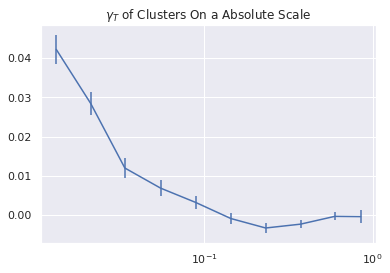

[-32.1239 -46.245  -30.6931 -29.0433 -22.3988  11.276   58.1447  55.0821
  10.3203   3.9458]
------------------------------------------------------------------------------
[ -3287.6667  -6268.1752  -8708.9286 -12386.3573 -17193.4931 -22256.1733
 -25036.3085 -22506.3759 -12733.4833  -1328.8399]
------------------------------------------------------------------------------
[  760.  1626.  2570.  4271.  7098. 11479. 17109. 22800. 24575.  8065.]
------------------------------------------------------------------------------
[-0.0423 -0.0284 -0.0119 -0.0068 -0.0032  0.001   0.0034  0.0024  0.0004
  0.0005]
------------------------------------------------------------------------------
[-4.3259 -3.855  -3.3887 -2.9001 -2.4223 -1.9389 -1.4633 -0.9871 -0.5181
 -0.1648]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

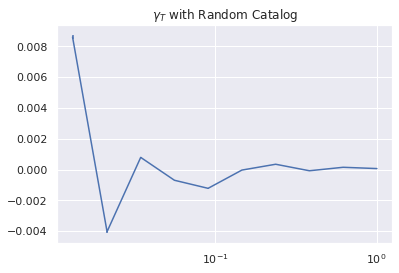

[ 8.6185e-03 -4.0265e-03  7.9752e-04 -6.8759e-04 -1.2114e-03 -2.6256e-05
  3.5231e-04 -7.0388e-05  1.5522e-04  7.1610e-05]
[-1.3110e-04  6.1247e-05 -1.2131e-05  1.0459e-05  1.8427e-05  3.9938e-07
 -5.3590e-06  1.0707e-06 -2.3610e-06 -1.0893e-06]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

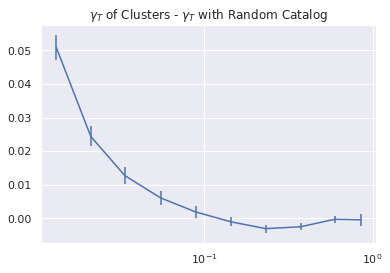

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

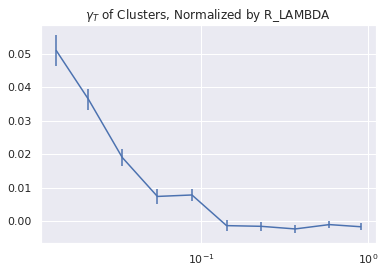

[-21.1748 -41.1351 -40.3647 -24.2398 -42.9504  12.2196  21.9259  46.8204
  25.701   33.6293]
------------------------------------------------------------------------------
[ -1790.0219  -4367.6069  -7197.0957  -9565.5636 -13371.3403 -17683.8496
 -20854.3732 -20137.6882 -13175.2253  -1991.7284]
------------------------------------------------------------------------------
[  416.  1132.  2121.  3291.  5504.  9062. 14130. 20059. 24752. 20002.]
------------------------------------------------------------------------------
[-0.0509 -0.0363 -0.019  -0.0074 -0.0078  0.0013  0.0016  0.0023  0.001
  0.0017]
------------------------------------------------------------------------------
[-4.3029 -3.8583 -3.3933 -2.9066 -2.4294 -1.9514 -1.4759 -1.0039 -0.5323
 -0.0996]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)